## Automated diagnosis of Acute Myeloid Leukemia using flow cytometry data

* Yonghua Zhuang
* Insight Health Data Science Fellow
* Boston, 06-30-2017

This is a project I developed when I was an insight health Data Science Fellow at Boston. I developed an automated acute Myeloid Leukemia (AML) classifier (www.aml-classifier.site), a machine learning-powered system that classifies whether a person has AML or not using flow cytometry data. This classifier has solved the issues of labor-intensive vision analysis and low reproducibility for high dimension flow cytometry data.

The raw data was preprocessed with R. 280 features have been engineered. 
Data has been subsampled to balance the control and case groups.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from ggplot import *
%pylab inline

In [75]:
# load prepared data with R
data  = pd.read_table("down_data2.txt", delim_whitespace=True)
data1 = pd.read_table("down_data1.txt", delim_whitespace=True)
data2 = pd.read_table("down_data2.txt", delim_whitespace=True)
data3 = pd.read_table("down_data3.txt", delim_whitespace=True)
data4 = pd.read_table("down_data4.txt", delim_whitespace=True)
data5 = pd.read_table("down_data5.txt", delim_whitespace=True)

In [76]:
data = data.drop("SampleNumber", axis=1)
X = data.drop("Class", axis=1)
Y = data["Class"]
Y = pd.get_dummies(Y).aml

In [78]:
# Split the dataset in training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=0)

In [79]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
logreg_accur=accuracy_score(Y_test, Y_pred_log)
logreg.score(X_train, Y_train)
logreg_accur

0.61538461538461542

In [80]:
## Support Vector Machines
## Scaling data for SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

svc = SVC(probability=True)
svc.fit(X_train_scaled, Y_train)
Y_pred_svc = svc.predict(X_test_scaled)
svc.score(X_train_scaled, Y_train)
svc_accur = accuracy_score(Y_test, Y_pred_svc)
svc_accur

0.90384615384615385

In [81]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.92307692307692313

### Findings:
* According to balanced accurcy, SVM and random forest perform much better logistic regression. 
* Random forest performs slightly better than SVM.
* Although SVM performs comparably well, the random forest method was chosen as final model because it is easier to interespret and doesn't require data scalling step. In addition, the random forest could prevent overfitting naturally. Overfiting could be a potential issue when the number of features is larger than the number of observations. 

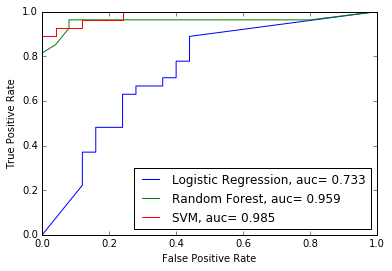

In [83]:
plt.figure(0).clf()
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_lr = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="Logistic Regression, auc= %0.3f" %(auc))

preds = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_rf = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="Random Forest, auc= %0.3f" %(auc))


preds = svc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_svc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="SVM, auc= %0.3f" %(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)

### Discussion
* ROC cureves indicated that SVM and random forest perform better than logistic regression. 
* Comments: ROC curves are not smooth because of small sample size. 

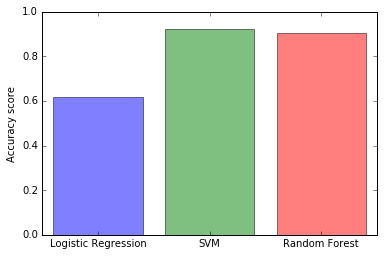

In [84]:
accuracy =  [logreg_accur, rf_accur, svc_accur]
objects = ('Logistic Regression', 'SVM', 'Random Forest' )
y_pos = np.arange(len(objects))
bar_width = 0.35
plt.bar(y_pos, accuracy, align='center', alpha=0.5, color=['b', 'g', 'r'] )
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score') 
plt.show()

In [85]:
# accuracy function to collect accracy score from LR, SVM and RF
def accurcy(data):
    #prepared data for analysis
    data = data.drop("SampleNumber", axis=1)
    X = data.drop("Class", axis=1)
    Y = data["Class"]
    Y = pd.get_dummies(Y).aml
    # Split the dataset in two equal parts
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=0)
    
    #Logestic regression
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    Y_pred_log = logreg.predict(X_test)
    logreg_accur=accuracy_score(Y_test, Y_pred_log)

    ##Support Vector Machines
    ## Scaling data for SVM
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
    svc = SVC(probability=True)
    svc.fit(X_train_scaled, Y_train)
    Y_pred_svc = svc.predict(X_test_scaled)
    svc_accur = accuracy_score(Y_test, Y_pred_svc)
    
    # Random Forests
    random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
    #random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
    random_forest.fit(X_train, Y_train)
    Y_pred_rf = random_forest.predict(X_test)
    random_forest.score(X_train, Y_train)
    rf_accur = accuracy_score(Y_test, Y_pred_rf)
    return [(logreg_accur, svc_accur, rf_accur)]

### To ensure the developed model could be generlized, subsampling has been repeated for 5 times.


In [86]:
# method comparison with 5 random subsamplings 
methodcom = accurcy(data1) + accurcy(data2) + accurcy(data3) + accurcy(data4) + accurcy(data5)
methodcom = pd.DataFrame(methodcom,  columns =  ["Logistic Regression", "SVM", "Random Forest"])

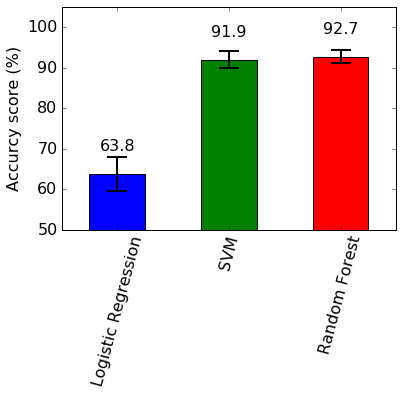

In [137]:
means = methodcom.mean()*100
errors = methodcom.std()*100
ax = (means.plot(yerr=errors,  kind='bar', color=['b', 'g', 'r'], rot=75, 
                error_kw=dict(ecolor='black', lw=2, capsize=10, capthick=2)))
ax.set_ylabel("Accurcy score (%)", fontsize=16)
ax.set_ylim(50,105)
#plt.axhline(y=91, color='g', linestyle='--')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

rects = ax.patches
# Now make some labels
labels = round(means,1)
for rect, label, error in zip(rects, labels, errors):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

### Comments
* Error bar indicates the standard deviation of accurcy mean from 5 times randomization. 

### List important features

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_labels = X_train.columns

In [118]:
# Tp 5 important features
xrange=range(5)
topimportances = importances[indices][:5]
topfeatures = feature_labels[indices][:5]  
topfeatures

Index(['X6.sd.Tube4', 'X6.median.Tube4', 'X2.mean.Tube8', 'X5.skew.Tube6',
       'X7.median.Tube7'],
      dtype='object')

In [119]:
topfeatures = ['CD16.SD', 'CD16.median', 'SSC.mean', 'CD45.skew',
       'CD10.median']

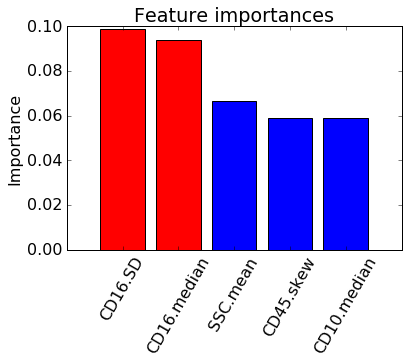

In [120]:
# Top 5 important features
matplotlib.rcParams.update({'font.size': 16})
plt.figure()
plt.title("Feature importances")
plt.bar(xrange, topimportances,
        color=['r', 'r', 'b', 'b', 'b'], align="center")
plt.xticks(xrange, topfeatures, rotation=60)
plt.ylabel('Importance') 
plt.show()

### The top 2 important features are related with CD16. CD16 biomarker information was detected in test D.  The next question I asked is whether I could use less biomarker information to classify AML. 

In [121]:
X_train_testD = X_train_scaled[ :, 105:140]
X_train_CD16 = X_train_scaled[ :, 131:135]
X_train_CD34 = X_train_scaled[ :, 200:205]

In [122]:
X_test_testD = X_test_scaled[ :, 105:140]
X_test_CD16 = X_test_scaled[ :, 131:135]
X_test_CD34 = X_test_scaled[ :, 200:205]

In [123]:
# Random Forests with test D
random_forest_testD = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train_testD, Y_train)
Y_pred_rf_testD = random_forest.predict(X_test_testD)
random_forest.score(X_train_testD, Y_train)
rf_accur_testD = accuracy_score(Y_test, Y_pred_rf_testD)
rf_accur_testD

0.94230769230769229

In [124]:
# Random Forests with CD16 features
random_forest_CD16 = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train_CD16, Y_train)
Y_pred_rf_CD16 = random_forest.predict(X_test_CD16)
random_forest.score(X_train_CD16, Y_train)
rf_accur_CD16 = accuracy_score(Y_test, Y_pred_rf_CD16)
rf_accur_CD16

0.80769230769230771

In [125]:
# Random Forests with CD34 features
random_forest_CD34 = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train_CD34, Y_train)
Y_pred_rf_CD34 = random_forest.predict(X_test_CD34)
random_forest.score(X_train_CD34, Y_train)
rf_accur_CD34 = accuracy_score(Y_test, Y_pred_rf_CD34)
rf_accur_CD34

0.82692307692307687

In [126]:
confusion_matrix(Y_test, Y_pred_rf_testD)

array([[23,  2],
       [ 1, 26]])

## Weighted Random forest 

Besides using subsampling to balance dataset, another way is weighted random forest model. 

In [128]:
alldata = pd.read_table("alldataprep2.txt", delim_whitespace=True)

In [130]:
alldata = alldata.drop("SampleNumber", axis=1)
X = alldata.drop("Label", axis=1)
Y = alldata["Label"]
Y = pd.get_dummies(Y).aml

In [152]:
# Split the dataset in two equal parts
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=100)

In [153]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.97685185185185186

In [154]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=100, random_state=10, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.97685185185185186

In [155]:
confusion_matrix(Y_test, Y_pred_rf)

array([[191,   2],
       [  3,  20]])

In [156]:
pd.crosstab(Y_test, Y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,191,2,193
1.0,3,20,23
All,194,22,216


## Comments: 
The sensitivity and specificity are 90% and 98.4% for weighted random forest model. 

## Cross validation

"By default random forest picks up 2/3rd data for training and rest for testing for regression and almost 70% data for training and rest for testing during classification.By principle since it randomizes the variable selection during each tree split it's not prone to overfit unlike other models".

In [157]:
from sklearn.cross_validation import cross_val_score
random_forest = RandomForestClassifier(n_estimators=15, random_state=0, class_weight="balanced")
scores = cross_val_score(random_forest, X, Y, cv=5)
scores 

array([ 0.95890411,  0.94444444,  0.97222222,  1.        ,  0.97183099])

In [158]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.969480352434
